In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt
from dateutil.relativedelta import relativedelta

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
end_date = engine.execute("SELECT max(date) FROM Measurement").fetchall()
end_date

[('2017-08-23',)]

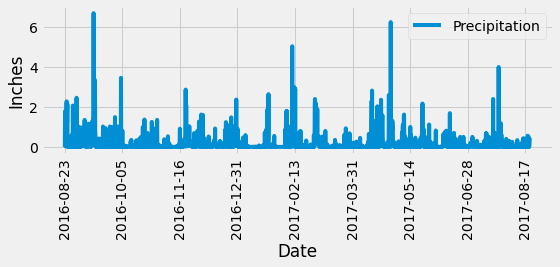

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

end_date = dt.date(2017,8,23)

start_date = end_date+relativedelta(years=-1)
start_date

# Perform a query to retrieve the data and precipitation scores

prcp_data = session.query(Measurement.date, Measurement.prcp).\
            filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
prcp_df = pd.DataFrame(prcp_data)
prcp_df = prcp_df.rename(columns={0: "Date", 1: "Precipitation"})
prcp_df = prcp_df.sort_values(["Date"])
prcp_df = prcp_df.set_index(["Date"])
prcp_df = prcp_df.dropna()

# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(rot=90, figsize=(8,4))
plt.ylabel('Inches')
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig("Images/precipitation.png")

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number stations in the dataset
engine.execute('SELECT count(station) FROM Station').fetchall()

[(9,)]

In [20]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_count = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
                order_by(func.count(Measurement.station).desc()).all()
station_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [23]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_id = 'USC00519281'
station_avg = session.query(func.avg(Measurement.prcp)).filter(Measurement.station == station_id).all()
station_min = session.query(func.min(Measurement.prcp)).filter(Measurement.station == station_id).all()
station_max = session.query(func.max(Measurement.prcp)).filter(Measurement.station == station_id).all()



[(0.2123520923520915,)]

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()